## 6.6 Uma Aplicação em Odometria Visual

In [98]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from utils import *

In [99]:
dim = (1188, 840)
tipo_mapa = cv2.CV_32FC1

---

1 - Calcule a matriz Q da reprojeção completa e o mapa correspondente via initUndistortRectifyMap. Reproduza os resultado da Figuras 6.26, 6.27 e 6.28.

a matriz de transformação no espaço global L' é dada por:
$$
L' = Q^{-1}L*Q
$$

In [100]:
# valores obtidos com a função
# imagem2global de um notebook anterior
y_max = 333.522
y_min = -320.964
x_max = 439.217
x_min = 62.422

s = 1

Q = np.array([[s,  0, -s*x_min],
              [0, -s,  s*y_max],
              [0,  0,        1]])

In [101]:
Q

array([[  1.   ,   0.   , -62.422],
       [  0.   ,  -1.   , 333.522],
       [  0.   ,   0.   ,   1.   ]])

Resultado da figura 6.26:

In [102]:
mapa_x2,mapa_y2 = cv2.initUndistortRectifyMap(mtx,dist, S, Q, dim, tipo_mapa)

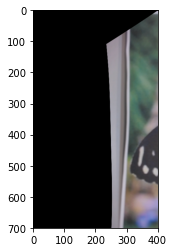

In [103]:
brabuleta = cv2.imread("brabuleta_horizontal.jpg")
borda = cv2.BORDER_CONSTANT
brabuleta = cv2.remap(brabuleta, mapa_x, mapa_y, cv2.INTER_LINEAR, borderMode=borda)
plt.xlim(0, 400)
plt.ylim(700, 0)
plt.imshow(brabuleta)

Resultado da figura 6.27:

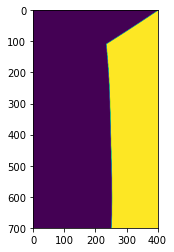

In [104]:
mascara = np.ones([720, 1280], dtype="uint8")*255
borda = cv2.BORDER_CONSTANT
mascara = cv2.remap(mascara, mapa_x, mapa_y, cv2.INTER_LINEAR, borderMode=borda)
plt.xlim(0, 400)
plt.ylim(700, 0)
plt.imshow(mascara)

Resultado da figura 6.28:

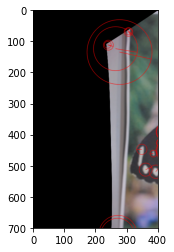

In [105]:
surf = cv2.xfeatures2d.SURF_create(10000)
kp, desc = surf.detectAndCompute(brabuleta, mascara)
brabuleta_com_surf = cv2.drawKeypoints(brabuleta, kp, brabuleta, (255,0,0), flags=5)
plt.xlim(0, 400)
plt.ylim(700, 0)
plt.imshow(brabuleta_com_surf)

---

In [106]:
np.size(brabuleta)

2388960

In [107]:
brabuleta.shape

(840, 948, 3)